# Analysis of Single-Step Methods

Consider the ODE from last time $$\frac{d^2y}{dt^2}=-y$$
We use the same plot function "plotDirectionField" as the previous worksheets. We add the function "showPhaseSpaceSolution" which shows the numerical solution in phase space

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def plotDirectionField(X, Y, U, V, pname):
    M = np.sqrt(pow(U, 2) + pow(V, 2))
    U = np.divide(U,M)
    V = np.divide(V,M)
    Q = plt.quiver( X, Y, U, V, M, units='xy', pivot='mid')
    plt.title(pname)

def showPhaseSpaceSolution(y0,y1,pname):
    min0 = min(y0)
    max0 = max(y0)
    dy0 = (max0-min0)/22
    min1 = min(y1)
    max1 = max(y1)
    dy1 = (max1-min1)/22
    X,Y = np.meshgrid( np.arange(min0,max0+dy0,dy0),
                       np.arange(min1,max1+dy1,dy1)) 
    U = Y
    V = -X
    plt.hold(True)
    plotDirectionField(X, Y, U, V, pname)
    plt.plot(y0,y1)
    plt.xlabel('y0')
    plt.ylabel('y1')
    plt.hold(False)

Initialization

In [5]:
N = 1000
tau = 0.1

y0 = np.zeros(N)
y1 = np.zeros(N)
time = np.arange(0,N*tau,tau)

y0[0] = 0.0
y1[0] = 1.0

## Explicit Euler

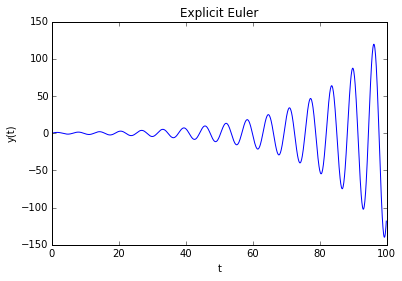

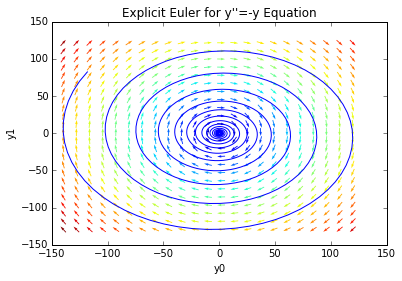

In [11]:
for k in range(1,N):
    y0[k] = y0[k-1] + tau*y1[k-1]
    y1[k] = -tau*y0[k-1] + y1[k-1]


plt.plot(time,y0)
plt.title('Explicit Euler')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.figure()
showPhaseSpaceSolution(y0,y1,"Explicit Euler for y''=-y Equation")


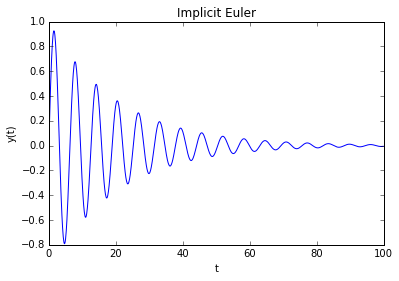

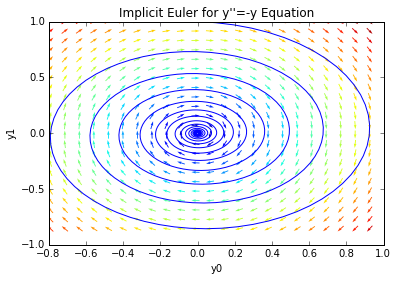

In [12]:
# Implicit Euler
a = (1+tau**2)
for k in range(1,N):
    y0[k] = (y0[k-1] + tau*y1[k-1])/a
    y1[k] = (-tau*y0[k-1] + y1[k-1])/a

plt.figure()
plt.plot(time,y0)
plt.title('Implicit Euler')
plt.xlabel('t')
plt.ylabel('y(t)')

plt.figure()
showPhaseSpaceSolution(y0,y1,"Implicit Euler for y''=-y Equation")

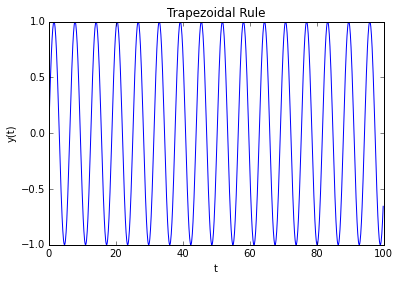

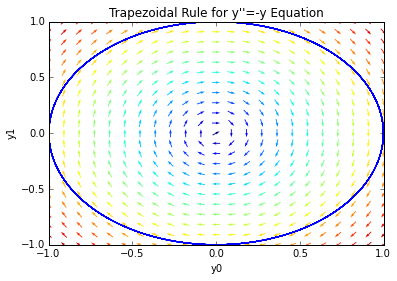

In [13]:
# Trapezoidal rule
a = (1+tau**2/4)
b = (1-tau**2/4)
for k in range(1,N):
    y0[k] = (b*y0[k-1] + tau*y1[k-1])/a
    y1[k] = (-tau*y0[k-1] + b*y1[k-1])/a

plt.figure()
plt.plot(time,y0)
plt.title('Trapezoidal Rule')
plt.xlabel('t')
plt.ylabel('y(t)')

plt.figure()
showPhaseSpaceSolution(y0,y1,"Trapezoidal Rule for y''=-y Equation")